In [2]:
from textblob import TextBlob
from googleapiclient.discovery import build
from googleapiclient.errors import HttpError
import matplotlib.pyplot as plt
import os

# Define your YouTube API key
GOOGLE_API_KEY = os.environ.get("GOOGLE_API_KEY")

In [3]:
def get_video_comments(video_id):
    comments = []
    youtube = build('youtube', 'v3', developerKey=GOOGLE_API_KEY)
    try:
        response = youtube.commentThreads().list(
            part='snippet',
            videoId=video_id,
            textFormat="plainText"
        ).execute()

        for item in response['items']:
            comment = item['snippet']['topLevelComment']['snippet']['textDisplay']
            comments.append(comment)
    except HttpError as e:
        print("An HTTP error occurred while fetching comments:", e)
    print(comments)
    return comments

In [4]:
def analyze_sentiment(comments):
    positive = 0
    negative = 0
    neutral = 0
    total = len(comments)

    for comment in comments:
        analysis = TextBlob(comment)
        polarity = analysis.sentiment.polarity
        if polarity > 0:
            positive += 1
        elif polarity < 0:
            negative += 1
        else:
            neutral += 1

    return positive, negative, neutral, total

In [8]:
def visualize_sentiment(positive, negative, neutral, total, channel):
    labels = ['Positive', 'Negative', 'Neutral']
    sizes = [positive, negative, neutral]
    colors = ['lightgreen', 'lightcoral', 'lightskyblue']
    explode = (0.1, 0, 0)  # explode 1st slice (positive)

    plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
    plt.axis('equal')
    plt.title(f'Sentiment Analysis of Comments for \"{channel}\"')
    plt.show()

["Propriety connections... hmmmm.. Apple up to it's old tricks again! They just can't keep the lid on their batshitcrazy.", 'the outside display is quite dim even for white skin', 'The most order this thing will get is from US DOD they will use this any day over BAE 500k helmet with way better visual quality', 'It looks just like any of these Chinese AR glasses, but with somewhat better controls', 'How practical is this thing?', 'Is life better with this thing or without this thing?', 'Who would need this?', "Once Samsung takes on this space it's going to be amazing especially if they integrate connectivity with all their other devices; smart TVs, smartphones and all...", 'Nice  futuristic options in it but not 4K nice.', 'Definitely can see this being outdated already', 'there might not be killer apps. i know a bunch of killer websites tho.', 'Ok am buying the Meta quest', 'thank you for this review.', "Isn't that AR and not VR?", '🔥🔥🔥 appreciate this video', 'ecosystem is a downside 

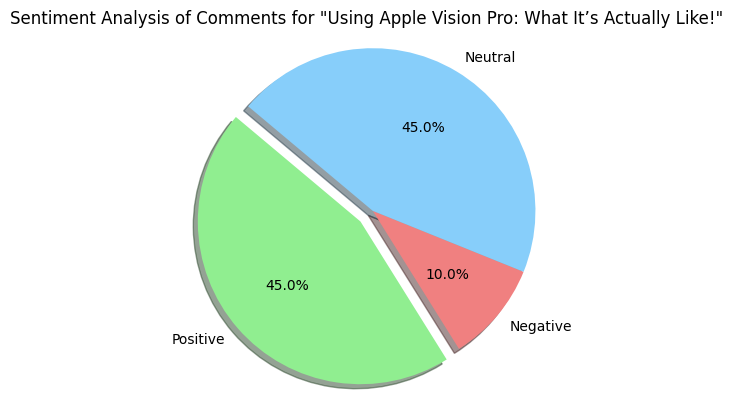

In [9]:
if __name__ == "__main__":
    videos = [{"id":"dtp6b76pMak", "channel":"Using Apple Vision Pro: What It’s Actually Like!"}]
    for video in videos:
        id = video["id"]
        channel = video["channel"]
        comments = get_video_comments(id)
        if comments:
            positive, negative, neutral, total = analyze_sentiment(comments)
            visualize_sentiment(positive, negative, neutral, total, channel)
        else:
            print("No comments found for this video.")